In [3]:
from classification.data_preparation import get_data
import matplotlib.pyplot as plt
import numpy as np

In [4]:
images, labels = get_data('../../data/Kather_texture_2016_image_tiles_5000', convert_to_categorical=False, target_size=None)
print(f"Number of images: {len(labels)}")

2023-03-17 08:52:10.947575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-17 08:52:10.947991: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 08:52:10.948109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-17 08:52:10.948194: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-17 08:52:10.948288: W tensorflow/c

Number of images: 5000


In [5]:
categories = {0: "Tumor", 1: "Stroma", 2: "Complex", 3: "Lympho", 4: "Debris", 5: "Mucosa", 6: "Adipose", 7: "Empty"}

In [6]:
unique, category_counts = np.unique(labels, return_counts=True)
category_counts

array([625, 625, 625, 625, 625, 625, 625, 625])

In [7]:
image_sizes = set()
for image in images:
    if image.shape not in image_sizes:
        image_sizes.add(image.shape)

image_sizes

{(150, 150, 3)}

In [8]:
def get_image_per_class(images_container, labels_container):
    final_images = {}
    for index, image in enumerate(images_container):
        label = int(labels_container[index])
        if label not in final_images:
            final_images[label] = image

    return dict(sorted(final_images.items()))

images_per_container = get_image_per_class(images, labels)

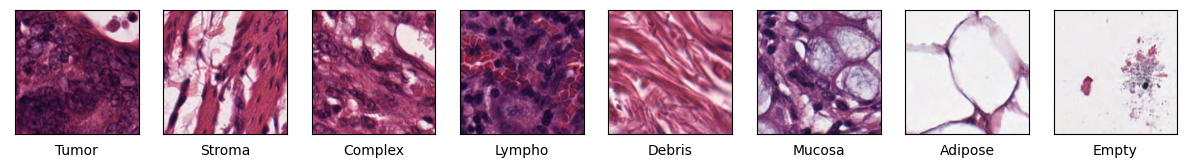

In [10]:
fig, ax = plt.subplots(1, 8, figsize=(15, 15))

for index, axis in enumerate(ax.flat):
    axis.imshow(images_per_container[index])
    axis.set(xticks=[], yticks=[], xlabel = categories[index])